In [1]:
library(dplyr)
library(ggplot2)
library(lubridate)
library(tidyverse)
library(ggrepel)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  2.1.3     ✔ purrr   0.3.2
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ lubridate::date()        masks base::date()
✖ dplyr::filter()          masks stats::filter()
✖ lubridate::intersect()   masks base::intersect()
✖ dplyr::lag()             masks stats::lag()
✖ lubridate::setdiff()     masks base::setdiff()
✖ lubridate::union()       masks base::union()


In [2]:
streak_df <- read.csv('/dsa/groups/casestudy2022su/team06/streak_data.csv')

In [3]:
head(streak_df)

X,tournament_id,player_id,date,golfer,cut,top10,streak_counter_cut,streak_counter_top10
<int>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>
0,2271,16,2014-10-12,Aaron Baddeley,1,0,1,1
1,2260,16,2014-10-19,Aaron Baddeley,1,0,2,2
2,2276,16,2014-10-26,Aaron Baddeley,1,0,3,3
3,2270,16,2014-11-16,Aaron Baddeley,1,0,4,4
4,2232,16,2015-02-01,Aaron Baddeley,1,0,5,5
5,2234,16,2015-02-08,Aaron Baddeley,0,0,1,6


In [4]:
print(class(streak_df$date))

[1] "factor"


In [5]:
streak_df$date <- as.Date(streak_df$date, format = '%Y-%m-%d')

In [6]:
str(streak_df)

'data.frame':	35545 obs. of  9 variables:
 $ X                   : int  0 1 2 3 4 5 6 7 8 9 ...
 $ tournament_id       : int  2271 2260 2276 2270 2232 2234 2233 2236 2261 2244 ...
 $ player_id           : int  16 16 16 16 16 16 16 16 16 16 ...
 $ date                : Date, format: "2014-10-12" "2014-10-19" ...
 $ golfer              : Factor w/ 499 levels "Aaron Baddeley",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ cut                 : int  1 1 1 1 1 0 1 0 1 0 ...
 $ top10               : int  0 0 0 0 0 0 0 0 0 0 ...
 $ streak_counter_cut  : int  1 2 3 4 5 1 1 1 1 1 ...
 $ streak_counter_top10: int  1 2 3 4 5 6 7 8 9 10 ...


In [7]:
print(class(streak_df$date))

[1] "Date"


In [8]:
tourney_df <- read.csv('/dsa/groups/casestudy2022su/team06/TourneyMasterFile.csv')

In [9]:
head(tourney_df)

X,tournament_id,player_id,date,golfer,tournament,course,purse,year,score,⋯,finish,rounds,cut,shots_gained_putt,shots_gained_around_green,shots_gained_approach_green,shots_gained_off_the_tee,shots_gained_tee_to_green,shots_gained_total,top10
<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<int>,⋯,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,401353254,9261,3/13/2022,Abraham Ancer,The Players Championship,"TPC Sawgrass - Ponte Vedra Beach, FL",20,2022,285,⋯,T33,4,1,0.16,0.04,0.70,0.20,0.94,1.09,0
2,401353254,5548,3/13/2022,Adam Hadwin,The Players Championship,"TPC Sawgrass - Ponte Vedra Beach, FL",20,2022,281,⋯,T9,4,1,1.43,-0.11,1.04,-0.27,0.67,2.09,1
3,401353254,4989,3/13/2022,Anirban Lahiri,The Players Championship,"TPC Sawgrass - Ponte Vedra Beach, FL",20,2022,276,⋯,2,4,1,1.41,0.02,1.04,0.87,1.93,3.34,1
4,401353254,6015,3/13/2022,Adam Long,The Players Championship,"TPC Sawgrass - Ponte Vedra Beach, FL",20,2022,287,⋯,T46,4,1,0.37,0.15,-0.61,0.67,0.22,0.59,0
5,401353254,3832,3/13/2022,Alexander Noren,The Players Championship,"TPC Sawgrass - Ponte Vedra Beach, FL",20,2022,284,⋯,T26,4,1,-0.15,0.08,1.25,0.16,1.49,1.34,0
6,401353254,5502,3/13/2022,Andrew Putnam,The Players Championship,"TPC Sawgrass - Ponte Vedra Beach, FL",20,2022,148,⋯,CUT,2,0,0.15,0.97,-0.30,-1.65,-0.97,-0.82,0


In [10]:
print(class(tourney_df$date))

[1] "factor"


In [11]:
tourney_df$date <- as.Date(tourney_df$date, format = '%m/%d/%Y')


In [12]:
print(class(tourney_df$date))

[1] "Date"


In [13]:
str(tourney_df)
#i want the streak columns playerid, tournamentid, date

'data.frame':	35545 obs. of  21 variables:
 $ X                          : int  1 2 3 4 5 6 7 8 9 10 ...
 $ tournament_id              : int  401353254 401353254 401353254 401353254 401353254 401353254 401353254 401353254 401353254 401353254 ...
 $ player_id                  : int  9261 5548 4989 6015 3832 5502 10372 388 10577 2283 ...
 $ date                       : Date, format: "2022-03-13" "2022-03-13" ...
 $ golfer                     : Factor w/ 499 levels "Aaron Baddeley",..: 5 6 30 7 18 26 8 9 3 71 ...
 $ tournament                 : Factor w/ 79 levels "3M Open","A Military Tribute at The Greenbrier",..: 59 59 59 59 59 59 59 59 59 59 ...
 $ course                     : Factor w/ 90 levels "Accordia Golf Narashino CC - Chiba, Japan",..: 82 82 82 82 82 82 82 82 82 82 ...
 $ purse                      : num  20 20 20 20 20 20 20 20 20 20 ...
 $ year                       : int  2022 2022 2022 2022 2022 2022 2022 2022 2022 2022 ...
 $ score                      : int  285 281 276 

In [14]:
tourney_df <- subset(tourney_df, select = c('tournament_id','player_id','date','year','score','shots_gained_total','purse'))
streak_df <- subset(streak_df, select = c('tournament_id','player_id','date','golfer','cut','top10',
                                          'streak_counter_cut','streak_counter_top10'))



In [15]:
df <- merge(x=streak_df,y=tourney_df, by =c('tournament_id','player_id','date'))






In [16]:
head(df)

tournament_id,player_id,date,golfer,cut,top10,streak_counter_cut,streak_counter_top10,year,score,shots_gained_total,purse
<int>,<int>,<date>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
2230,1067,2015-01-12,J.B. Holmes,1,0,3,3,2015,289,NA,5.7
2230,1077,2015-01-12,Kevin Streelman,1,0,4,3,2015,282,NA,5.7
2230,1112,2015-01-12,Steven Bowditch,1,0,2,4,2015,282,NA,5.7
2230,1225,2015-01-12,Brian Harman,1,0,1,3,2015,280,NA,5.7
2230,1264,2015-01-12,Camilo Villegas,1,0,1,4,2015,287,NA,5.7
2230,1367,2015-01-12,Matt Jones,1,0,3,4,2015,278,NA,5.7


In [17]:
df %>%
filter(golfer == 'Aaron Baddeley') %>%
arrange(date) %>%
head()


tournament_id,player_id,date,golfer,cut,top10,streak_counter_cut,streak_counter_top10,year,score,shots_gained_total,purse
<int>,<int>,<date>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
2271,16,2014-10-12,Aaron Baddeley,1,0,1,1,2015,283,NA,6.0
2260,16,2014-10-19,Aaron Baddeley,1,0,2,2,2015,275,0.75,6.2
2276,16,2014-10-26,Aaron Baddeley,1,0,3,3,2015,276,NA,5.6
2270,16,2014-11-16,Aaron Baddeley,1,0,4,4,2015,277,NA,6.1
2232,16,2015-02-01,Aaron Baddeley,1,0,5,5,2015,276,1.53,6.3
2234,16,2015-02-08,Aaron Baddeley,0,0,1,6,2015,147,-2.34,6.3


In [18]:
df_sorted <- df %>%
arrange(date)

In [19]:
df_sorted_na <- df_sorted %>%
drop_na(shots_gained_total)

In [20]:
str(df_sorted_na)

'data.frame':	28032 obs. of  12 variables:
 $ tournament_id       : int  2260 2260 2260 2260 2260 2260 2260 2260 2260 2260 ...
 $ player_id           : int  1030 1037 1042 1049 1077 11 1112 1121 1157 1173 ...
 $ date                : Date, format: "2014-10-19" "2014-10-19" ...
 $ golfer              : Factor w/ 499 levels "Aaron Baddeley",..: 210 404 331 66 261 430 428 84 448 200 ...
 $ cut                 : int  0 1 1 0 1 0 0 0 0 1 ...
 $ top10               : int  0 1 0 0 1 0 0 0 0 0 ...
 $ streak_counter_cut  : int  2 1 1 2 1 1 1 1 1 1 ...
 $ streak_counter_top10: int  2 1 1 2 1 2 2 2 2 2 ...
 $ year                : int  2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 ...
 $ score               : int  142 270 272 143 266 138 141 136 142 273 ...
 $ shots_gained_total  : num  -0.95 2 1.5 -1.45 3 -2.84 -0.45 -0.51 -0.95 1.25 ...
 $ purse               : num  6.2 6.2 6.2 6.2 6.2 6.2 6.2 6.2 6.2 6.2 ...


In [21]:
summary(df_sorted_na)
#big money > 7.5

 tournament_id         player_id            date           
 Min.   :     2232   Min.   :      5   Min.   :2014-10-19  
 1st Qu.:     2704   1st Qu.:   1185   1st Qu.:2017-03-12  
 Median :401056511   Median :   3857   Median :2019-01-20  
 Mean   :242626671   Mean   :  73520   Mean   :2018-10-31  
 3rd Qu.:401219333   3rd Qu.:   6196   3rd Qu.:2020-08-16  
 Max.   :401353254   Max.   :4845309   Max.   :2022-03-13  
                                                           
          golfer           cut             top10         streak_counter_cut
 Danny Lee   :  185   Min.   :0.0000   Min.   :0.00000   Min.   : 1.000    
 Brian Stuard:  167   1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.: 1.000    
 Tom Hoge    :  162   Median :1.0000   Median :0.00000   Median : 2.000    
 Nick Taylor :  158   Mean   :0.5858   Mean   :0.09589   Mean   : 2.777    
 Brian Harman:  157   3rd Qu.:1.0000   3rd Qu.:0.00000   3rd Qu.: 3.000    
 Troy Merritt:  155   Max.   :1.0000   Max.   :1.00000   Max.   

In [22]:
top_10_cut_streak <- df_sorted_na %>%
filter(cut==1) %>%
group_by(golfer) %>%
summarise(top_10_cut_streak = max(streak_counter_cut)) %>%
arrange(desc(top_10_cut_streak)) %>%
top_n(10,top_10_cut_streak )
top_10_cut_streak

golfer,top_10_cut_streak
<fct>,<int>
Dustin Johnson,31
Tommy Fleetwood,31
Emiliano Grillo,27
Hideki Matsuyama,25
Matt Kuchar,25
Paul Casey,25
Rory McIlroy,25
Adam Scott,24
Brooks Koepka,23


In [23]:
bot_10_cut_streak <- df_sorted_na %>%
filter(cut==0) %>%
group_by(golfer) %>%
summarise(bot_10_cut_streak = max(streak_counter_cut)) %>%
arrange(desc(bot_10_cut_streak)) %>%
top_n(10,bot_10_cut_streak )
bot_10_cut_streak

golfer,bot_10_cut_streak
<fct>,<int>
Michael Kim,21
Matt Every,20
Brendon Todd,18
Nick Watney,17
Smylie Kaufman,16
Martin Trainer,15
Robert Allenby,14
Steven Bowditch,14
Blayne Barber,12


In [24]:
top_10_top10_streak <- df_sorted_na %>%
filter(top10==1) %>%
group_by(golfer) %>%
summarise(top_10_top10_streak = max(streak_counter_top10)) %>%
arrange(desc(top_10_top10_streak)) %>%
top_n(10,top_10_top10_streak )
top_10_top10_streak

golfer,top_10_top10_streak
<fct>,<int>
Bryson DeChambeau,7
Dustin Johnson,6
Patrick Cantlay,6
Rory McIlroy,6
Daniel Berger,5
Jason Day,4
Jon Rahm,4
Paul Casey,4
Phil Mickelson,4


In [25]:
bot_10_top10_streak <- df_sorted_na %>%
filter(top10==0) %>%
group_by(golfer) %>%
summarise(bot_10_top10_streak = max(streak_counter_top10)) %>%
arrange(desc(bot_10_top10_streak)) %>%
top_n(10,bot_10_top10_streak )
bot_10_top10_streak

golfer,bot_10_top10_streak
<fct>,<int>
Peter Malnati,126
Fabian Gomez,117
Brice Garnett,92
Greg Chalmers,89
Hunter Mahan,83
Matt Jones,82
D.A. Points,81
Brendon De Jonge,79
John Senden,79


In [26]:
top10_cut_score <- df_sorted_na %>%
filter(golfer %in% top_10_cut_streak$golfer) %>%
group_by(golfer) %>%
summarise(avg_score = mean(score), avg_sg = mean(shots_gained_total)) %>%
merge(top_10_cut_streak, by='golfer') %>%
arrange(desc(top_10_cut_streak))
top10_cut_score

golfer,avg_score,avg_sg,top_10_cut_streak
<fct>,<dbl>,<dbl>,<int>
Dustin Johnson,258.1165,1.4084466,31
Tommy Fleetwood,255.1833,0.6656667,31
Emiliano Grillo,239.5877,0.1251754,27
Hideki Matsuyama,254.0082,0.9517213,25
Matt Kuchar,250.0000,0.6192800,25
Paul Casey,254.3500,0.9241000,25
Rory McIlroy,260.8780,1.4821951,25
Adam Scott,256.5977,0.9139080,24
Brooks Koepka,246.6852,0.8050000,23


In [27]:
top10_cut_score$golfer
#use these in order to graph 

[1] Dustin Johnson    Tommy Fleetwood   Emiliano Grillo   Hideki Matsuyama 
 [5] Matt Kuchar       Paul Casey        Rory McIlroy      Adam Scott       
 [9] Brooks Koepka     Jason Kokrak      Xander Schauffele
499 Levels: Aaron Baddeley Aaron Rai Aaron Wise Abel Gallegos ... Zheng-kai Bai

In [28]:
order_streak_madecut <- c('Dustin Johnson', 'Tommy Fleetwood', 'Emiliano Grillo',
                          'Hideki Matsuyama', 'Matt Kuchar', 'Paul Casey','Rory McIlroy', 'Adam Scott' ,
                          'Brooks Koepka', 'Jason Kokrak','Xander Schauffele')

In [29]:
top10_cut_score_sgsort <- df_sorted_na %>%
filter(golfer %in% top_10_cut_streak$golfer) %>%
group_by(golfer) %>%
summarise(avg_score = mean(score), avg_sg = mean(shots_gained_total)) %>%
merge(top_10_cut_streak, by='golfer') %>%
arrange(desc(avg_sg))
top10_cut_score_sgsort

golfer,avg_score,avg_sg,top_10_cut_streak
<fct>,<dbl>,<dbl>,<int>
Rory McIlroy,260.8780,1.4821951,25
Dustin Johnson,258.1165,1.4084466,31
Hideki Matsuyama,254.0082,0.9517213,25
Paul Casey,254.3500,0.9241000,25
Adam Scott,256.5977,0.9139080,24
Xander Schauffele,249.0440,0.9113187,23
Brooks Koepka,246.6852,0.8050000,23
Tommy Fleetwood,255.1833,0.6656667,31
Matt Kuchar,250.0000,0.6192800,25


In [30]:
top10_cut_score_sgsort$golfer

[1] Rory McIlroy      Dustin Johnson    Hideki Matsuyama  Paul Casey       
 [5] Adam Scott        Xander Schauffele Brooks Koepka     Tommy Fleetwood  
 [9] Matt Kuchar       Jason Kokrak      Emiliano Grillo  
499 Levels: Aaron Baddeley Aaron Rai Aaron Wise Abel Gallegos ... Zheng-kai Bai

In [31]:
order_sg_madecut <- c('Rory McIlroy', 'Dustin Johnson',' Hideki Matsuyama' ,
                      'Paul Casey', 'Adam Scott', 'Xander Schauffele', 'Brooks Koepka', 
                      'Tommy Fleetwood', 'Matt Kuchar', 'Jason Kokrak', 'Emiliano Grillo')

In [32]:
bot10_cut_score <- df_sorted_na %>%
filter(golfer %in% bot_10_cut_streak$golfer) %>%
group_by(golfer) %>%
summarise(avg_score = mean(score), avg_sg = mean(shots_gained_total)) %>%
merge(bot_10_cut_streak, by='golfer') %>%
arrange(desc(bot_10_cut_streak))
bot10_cut_score

golfer,avg_score,avg_sg,bot_10_cut_streak
<fct>,<dbl>,<dbl>,<int>
Michael Kim,194.1441,-1.2501695,21
Matt Every,183.1897,-1.9368103,20
Brendon Todd,215.8667,-0.4550476,18
Nick Watney,222.7769,-0.3684615,17
Smylie Kaufman,193.8833,-2.4056667,16
Martin Trainer,174.4189,-2.1017568,15
Robert Allenby,169.5682,-1.9715909,14
Steven Bowditch,183.5161,-2.3109677,14
Blayne Barber,212.5342,-0.3802740,12


In [33]:
bot10_cut_score$golfer
#use these in reverse order to graph

[1] Michael Kim     Matt Every      Brendon Todd    Nick Watney    
 [5] Smylie Kaufman  Martin Trainer  Robert Allenby  Steven Bowditch
 [9] Blayne Barber   Brandon Hagy    Carl Pettersson D.A. Points    
[13] John Rollins   
499 Levels: Aaron Baddeley Aaron Rai Aaron Wise Abel Gallegos ... Zheng-kai Bai

In [34]:
order_streak_missedcut <- c('John Rollins','D.A. Points','Carl Pettersson','Brandon Hagy',
                           'Blayne Barber','Steven Bowditch','Robert Allenby','Martin Trainer',
                           'Smylie Kaufman','Nick Watney','Brendon Todd','Matt Every','Michael Kim')

In [35]:
bot10_cut_score_sgsort <- df_sorted_na %>%
filter(golfer %in% bot_10_cut_streak$golfer) %>%
group_by(golfer) %>%
summarise(avg_score = mean(score), avg_sg = mean(shots_gained_total)) %>%
merge(bot_10_cut_streak, by='golfer') %>%
arrange(desc(avg_sg))
bot10_cut_score_sgsort

golfer,avg_score,avg_sg,bot_10_cut_streak
<fct>,<dbl>,<dbl>,<int>
Nick Watney,222.7769,-0.3684615,17
Blayne Barber,212.5342,-0.3802740,12
Brendon Todd,215.8667,-0.4550476,18
Brandon Hagy,200.9310,-0.7031034,12
D.A. Points,185.4124,-1.2277320,12
Michael Kim,194.1441,-1.2501695,21
John Rollins,186.8667,-1.6530000,12
Matt Every,183.1897,-1.9368103,20
Carl Pettersson,186.1594,-1.9421739,12


In [36]:
bot10_cut_score_sgsort$golfer

[1] Nick Watney     Blayne Barber   Brendon Todd    Brandon Hagy   
 [5] D.A. Points     Michael Kim     John Rollins    Matt Every     
 [9] Carl Pettersson Robert Allenby  Martin Trainer  Steven Bowditch
[13] Smylie Kaufman 
499 Levels: Aaron Baddeley Aaron Rai Aaron Wise Abel Gallegos ... Zheng-kai Bai

In [37]:
order_sg_missedcut <- c('Nick Watney', 'Blayne Barber', 'Brendon Todd', 'Brandon Hagy',
                        'D.A. Points', 'Michael Kim', 'John Rollins', 'Matt Every', 'Carl Pettersson',
                        'Robert Allenby', 'Martin Trainer', 'Steven Bowditch', 'Smylie Kaufman')

In [38]:
top10_top10_score <- df_sorted_na %>%
filter(golfer %in% top_10_top10_streak$golfer) %>%
group_by(golfer) %>%
summarise(avg_score = mean(score),avg_sg = mean(shots_gained_total)) %>%
merge(top_10_top10_streak, by='golfer') %>%
arrange(desc(top_10_top10_streak))
top10_top10_score

golfer,avg_score,avg_sg,top_10_top10_streak
<fct>,<dbl>,<dbl>,<int>
Bryson DeChambeau,240.4519,0.8142308,7
Dustin Johnson,258.1165,1.4084466,6
Patrick Cantlay,265.0000,1.4065000,6
Rory McIlroy,260.8780,1.4821951,6
Daniel Berger,248.4286,0.7398413,5
Jason Day,242.8000,0.9327000,4
Jon Rahm,261.4091,1.5846591,4
Paul Casey,254.3500,0.9241000,4
Phil Mickelson,243.4464,0.1727679,4


In [39]:
top10_top10_score$golfer

[1] Bryson DeChambeau Dustin Johnson    Patrick Cantlay   Rory McIlroy     
 [5] Daniel Berger     Jason Day         Jon Rahm          Paul Casey       
 [9] Phil Mickelson    Tyrrell Hatton   
499 Levels: Aaron Baddeley Aaron Rai Aaron Wise Abel Gallegos ... Zheng-kai Bai

In [40]:
order_streak_madetop10 <- c('Bryson DeChambeau', 'Dustin Johnson', 'Patrick Cantlay',
                            'Rory McIlroy', 'Daniel Berger', 'Jason Day' ,'Jon Rahm' ,
                            'Paul Casey', 'Phil Mickelson','Tyrrell Hatton')

In [41]:
top10_top10_score_sgsort <- df_sorted_na %>%
filter(golfer %in% top_10_top10_streak$golfer) %>%
group_by(golfer) %>%
summarise(avg_score = mean(score),avg_sg = mean(shots_gained_total)) %>%
merge(top_10_top10_streak, by='golfer') %>%
arrange(desc(avg_sg))
top10_top10_score_sgsort

golfer,avg_score,avg_sg,top_10_top10_streak
<fct>,<dbl>,<dbl>,<int>
Jon Rahm,261.4091,1.5846591,4
Rory McIlroy,260.8780,1.4821951,6
Dustin Johnson,258.1165,1.4084466,6
Patrick Cantlay,265.0000,1.4065000,6
Jason Day,242.8000,0.9327000,4
Paul Casey,254.3500,0.9241000,4
Tyrrell Hatton,247.7377,0.8191803,4
Bryson DeChambeau,240.4519,0.8142308,7
Daniel Berger,248.4286,0.7398413,5


In [42]:
top10_top10_score_sgsort$golfer

[1] Jon Rahm          Rory McIlroy      Dustin Johnson    Patrick Cantlay  
 [5] Jason Day         Paul Casey        Tyrrell Hatton    Bryson DeChambeau
 [9] Daniel Berger     Phil Mickelson   
499 Levels: Aaron Baddeley Aaron Rai Aaron Wise Abel Gallegos ... Zheng-kai Bai

In [43]:
order_sg_madetop10 <- c('Jon Rahm', 'Rory McIlroy', 'Dustin Johnson', 'Patrick Cantlay',
                        'Jason Day', 'Paul Casey', 'Tyrrell Hatton', 'Bryson DeChambeau',
                        'Daniel Berger', 'Phil Mickelson')

In [44]:
bot10_top10_score <- df_sorted_na %>%
filter(golfer %in% bot_10_top10_streak$golfer) %>%
group_by(golfer) %>%
summarise(avg_score = mean(score), avg_sg = mean(shots_gained_total)) %>%
merge(bot_10_top10_streak, by='golfer') %>%
arrange(desc(bot_10_top10_streak))
bot10_top10_score

golfer,avg_score,avg_sg,bot_10_top10_streak
<fct>,<dbl>,<dbl>,<int>
Peter Malnati,207.5168,-0.4859732,126
Fabian Gomez,206.2712,-0.5553390,117
Brice Garnett,207.4480,-0.5188000,92
Greg Chalmers,203.3472,-1.1762500,89
Hunter Mahan,198.5833,-1.0720370,83
Matt Jones,227.3958,-0.1167361,82
D.A. Points,185.4124,-1.2277320,81
Brendon De Jonge,195.5571,-0.9148571,79
John Senden,198.2250,-0.8845000,79


In [45]:
bot10_top10_score$golfer

[1] Peter Malnati    Fabian Gomez     Brice Garnett    Greg Chalmers   
 [5] Hunter Mahan     Matt Jones       D.A. Points      Brendon De Jonge
 [9] John Senden      Derek Fathauer   Sang-Moon Bae   
499 Levels: Aaron Baddeley Aaron Rai Aaron Wise Abel Gallegos ... Zheng-kai Bai

In [46]:
order_streak_missedtop10 <- c('Derek Fathauer', 'Sang-Moon Bae',' Brendon De Jonge',
                              'John Senden', 'D.A. Points', 'Matt Jones', 'Hunter Mahan',
                              'Greg Chalmers', 'Brice Garnett', 'Fabian Gomez',' Peter Malnati')

In [47]:
bot10_top10_score_sgsort <- df_sorted_na %>%
filter(golfer %in% bot_10_top10_streak$golfer) %>%
group_by(golfer) %>%
summarise(avg_score = mean(score), avg_sg = mean(shots_gained_total)) %>%
merge(bot_10_top10_streak, by='golfer') %>%
arrange(desc(avg_sg))
bot10_top10_score_sgsort

golfer,avg_score,avg_sg,bot_10_top10_streak
<fct>,<dbl>,<dbl>,<int>
Matt Jones,227.3958,-0.1167361,82
Peter Malnati,207.5168,-0.4859732,126
Brice Garnett,207.4480,-0.5188000,92
Fabian Gomez,206.2712,-0.5553390,117
John Senden,198.2250,-0.8845000,79
Brendon De Jonge,195.5571,-0.9148571,79
Hunter Mahan,198.5833,-1.0720370,83
Greg Chalmers,203.3472,-1.1762500,89
D.A. Points,185.4124,-1.2277320,81


In [48]:
bot10_top10_score_sgsort$golfer

[1] Matt Jones       Peter Malnati    Brice Garnett    Fabian Gomez    
 [5] John Senden      Brendon De Jonge Hunter Mahan     Greg Chalmers   
 [9] D.A. Points      Derek Fathauer   Sang-Moon Bae   
499 Levels: Aaron Baddeley Aaron Rai Aaron Wise Abel Gallegos ... Zheng-kai Bai

In [49]:
order_sg_missedtop10 <- c('Matt Jones ','Peter Malnati', 'Brice Garnett',
                          'Fabian Gomez' ,'John Senden' ,'Brendon De Jonge' ,'Hunter Mahan',
                          'Greg Chalmers' ,'D.A. Points' ,'Derek Fathauer ','Sang-Moon Bae')

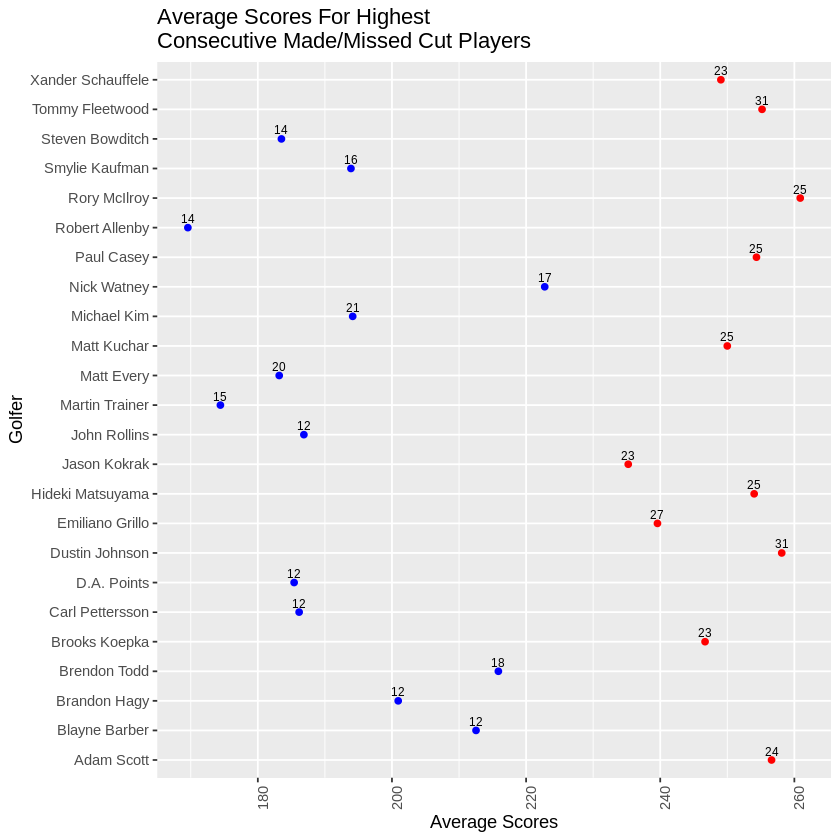

In [50]:
ggplot() + 
geom_point(data=top10_cut_score, aes(x=golfer,y=avg_score), col='red') +
geom_text(data =top10_cut_score, aes(x=golfer, y=avg_score, label = top_10_cut_streak), vjust=-.5, size=2.5) +
geom_point(data=bot10_cut_score, aes(x=golfer,y=avg_score), col='blue') +
geom_text(data=bot10_cut_score, aes(x=golfer,y=avg_score, label = bot_10_cut_streak), vjust=-.5, size=2.5) +
theme(axis.text.x = element_text(angle = 90)) +
labs(title='Average Scores For Highest\nConsecutive Made/Missed Cut Players', x='Golfer', 
     y='Average Scores') +
coord_flip()



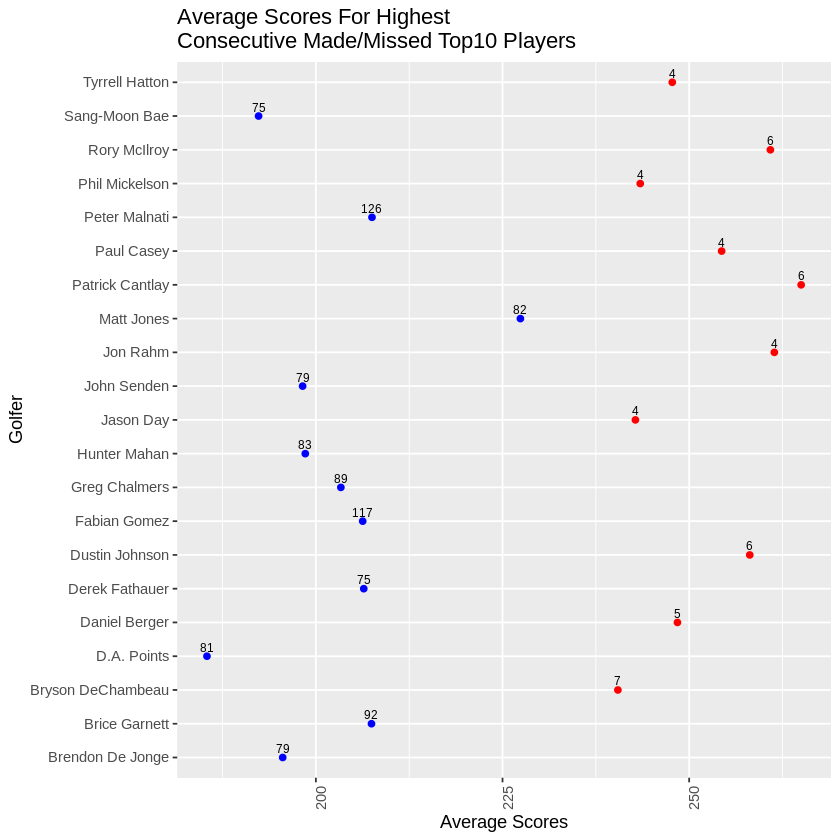

In [51]:
ggplot() + 
geom_point(data=top10_top10_score, aes(x=golfer,y=avg_score), col='red') +
geom_text(data =top10_top10_score, aes(x=golfer, y=avg_score, label = top_10_top10_streak), vjust=-.5, size=2.5) +
geom_point(data=bot10_top10_score, aes(x=golfer,y=avg_score), col='blue') +
geom_text(data=bot10_top10_score, aes(x=golfer,y=avg_score, label = bot_10_top10_streak), vjust=-.5, size=2.5) +
theme(axis.text.x = element_text(angle = 90)) +
labs(title='Average Scores For Highest\nConsecutive Made/Missed Top10 Players', x='Golfer', 
     y='Average Scores') +
coord_flip()

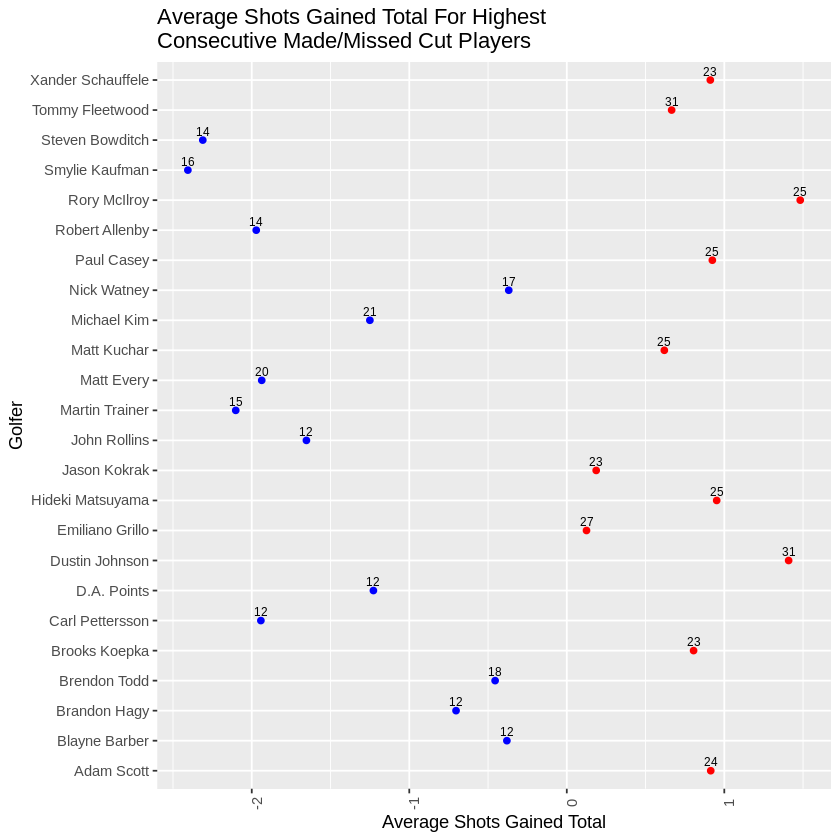

In [52]:
ggplot() + 
geom_point(data=top10_cut_score, aes(x=golfer,y=avg_sg), col='red') +
geom_text(data =top10_cut_score, aes(x=golfer, y=avg_sg, label = top_10_cut_streak), vjust=-.5, size=2.5) +
geom_point(data=bot10_cut_score, aes(x=golfer,y=avg_sg), col='blue') +
geom_text(data=bot10_cut_score, aes(x=golfer,y=avg_sg, label = bot_10_cut_streak), vjust=-.5, size=2.5) +
theme(axis.text.x = element_text(angle = 90)) +
labs(title='Average Shots Gained Total For Highest\nConsecutive Made/Missed Cut Players', x='Golfer', 
     y='Average Shots Gained Total') +
coord_flip()

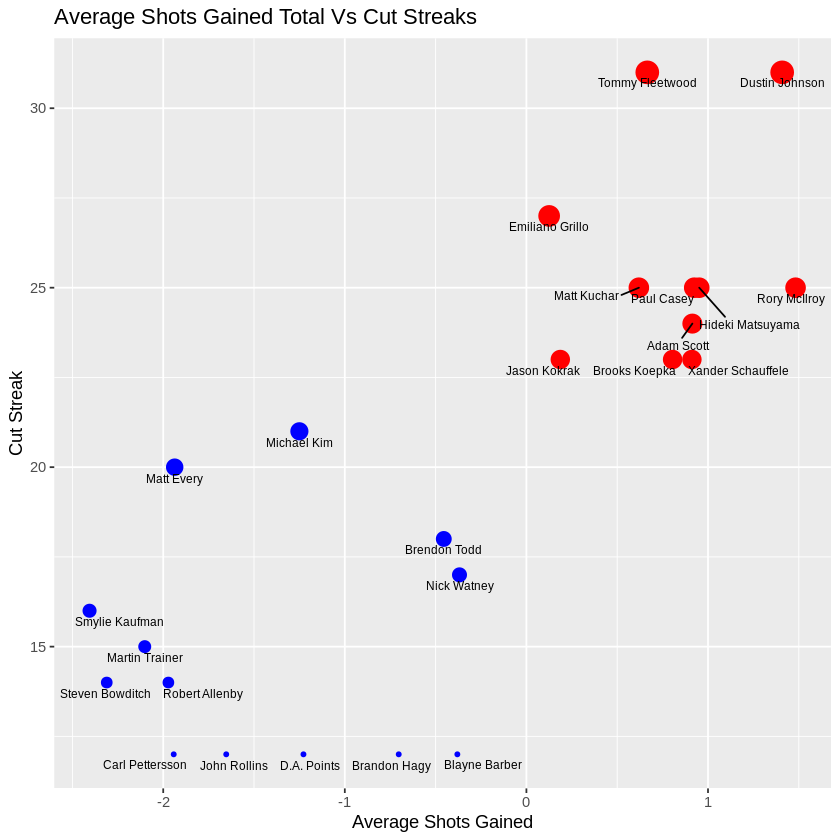

In [54]:
cut_sg <- ggplot() + 
geom_point(data=top10_cut_score, aes(x=avg_sg,y=top_10_cut_streak, size=top_10_cut_streak), col='red') +
geom_text_repel(data =top10_cut_score, aes(x=avg_sg, y=top_10_cut_streak, label = golfer), vjust=-.40, size=2.5) +
geom_point(data=bot10_cut_score, aes(x=avg_sg,y=bot_10_cut_streak, size=bot_10_cut_streak), col='blue') +
geom_text_repel(data=bot10_cut_score,  aes(x=avg_sg, y=bot_10_cut_streak, label = golfer), vjust=-.40, size=2.5) +
labs(title='Average Shots Gained Total Vs Cut Streaks', x='Average Shots Gained', 
     y='Cut Streak') +
theme(legend.position="none")
cut_sg

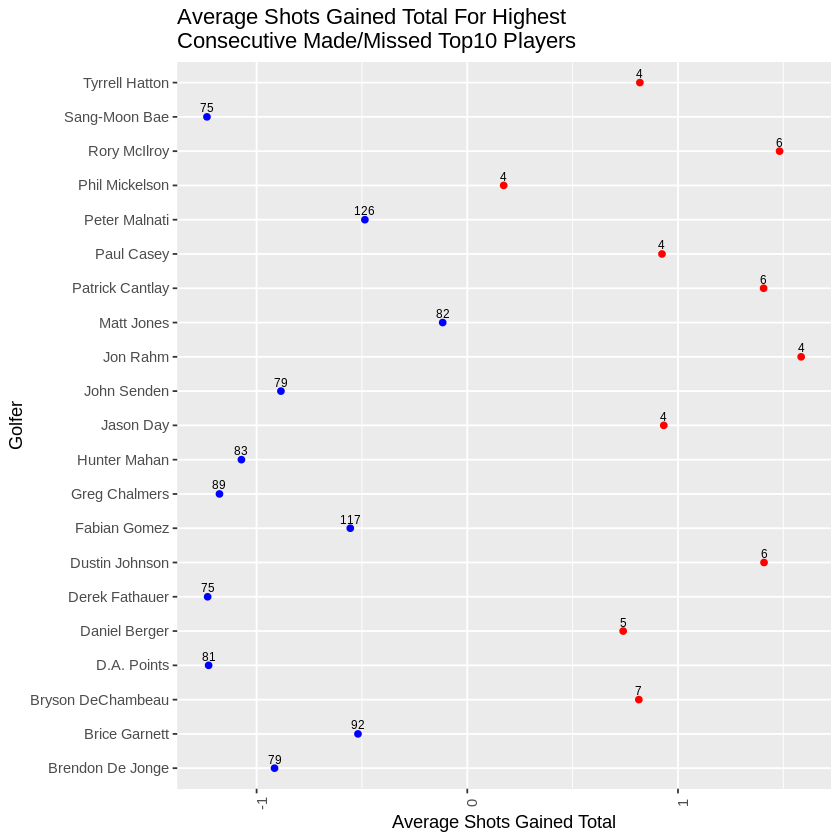

In [55]:
ggplot() + 
geom_point(data=top10_top10_score, aes(x=golfer,y=avg_sg), col='red') +
geom_text(data =top10_top10_score, aes(x=golfer, y=avg_sg, label = top_10_top10_streak), vjust=-.5, size=2.5) +
geom_point(data=bot10_top10_score, aes(x=golfer,y=avg_sg), col='blue') +
geom_text(data=bot10_top10_score, aes(x=golfer,y=avg_sg, label = bot_10_top10_streak), vjust=-.5, size=2.5) +
theme(axis.text.x = element_text(angle = 90)) +
labs(title='Average Shots Gained Total For Highest\nConsecutive Made/Missed Top10 Players', x='Golfer', 
     y='Average Shots Gained Total') +
coord_flip()

In [56]:
money <- df_sorted_na %>%
group_by(purse) %>%
summarise(avg_sg = mean(shots_gained_total))
money

purse,avg_sg
<dbl>,<dbl>
3.50,-0.22210953
4.00,-0.12089888
4.20,-0.24840426
4.30,-0.23924528
4.40,-0.42766129
4.70,-0.22309091
4.80,-0.16741071
5.40,-0.20426087
5.60,-0.21653740


In [57]:
cor(df_sorted_na$purse,df_sorted_na$shots_gained_total)

[1] 0.004832306

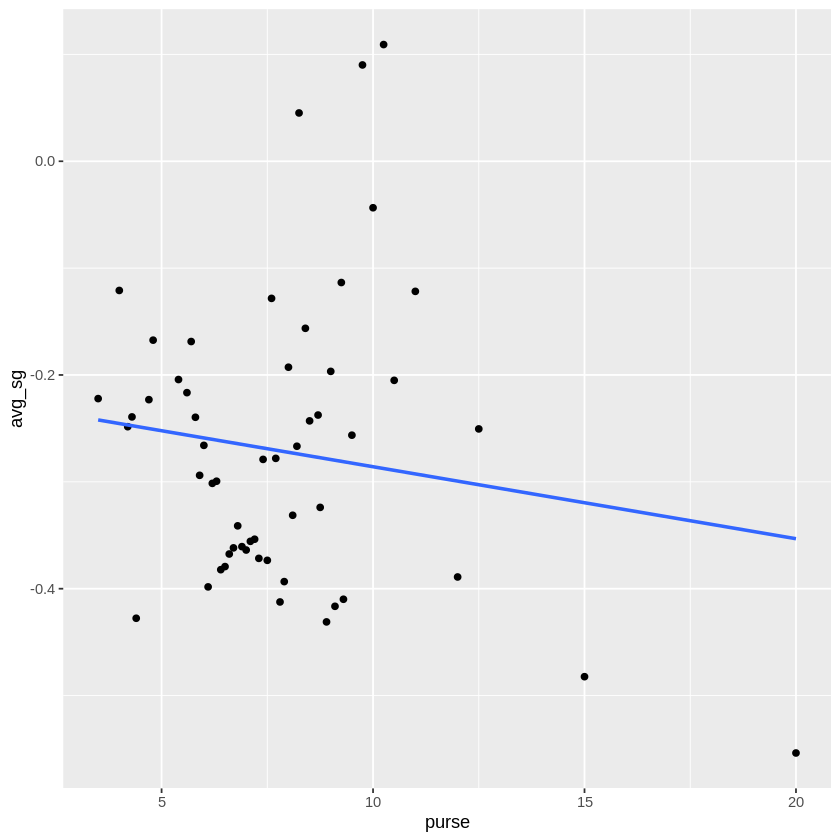

In [58]:
ggplot(data=money, aes(x=purse,y=avg_sg)) +
geom_point() +
geom_smooth(method = "lm", se = FALSE)

In [59]:
df_sorted_na %>%
filter(purse > 12.5)
#these tournaments have higher skill and bring down the avg shots gained
#removing anything w a purse over 12.5 might reveal a better understanding of actual tournaments with average players

tournament_id,player_id,date,golfer,cut,top10,streak_counter_cut,streak_counter_top10,year,score,shots_gained_total,purse
<int>,<int>,<date>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
401243005,10046,2021-03-14,Bryson DeChambeau,1,1,3,2,2021,276,3.13,15
401243005,10054,2021-03-14,Denny McCarthy,1,0,2,12,2021,288,0.13,15
401243005,10140,2021-03-14,Xander Schauffele,0,0,1,3,2021,148,-1.08,15
401243005,1030,2021-03-14,Jhonattan Vegas,1,0,3,34,2021,290,-0.37,15
401243005,10363,2021-03-14,Kramer Hickok,1,0,1,58,2021,289,-0.12,15
401243005,1037,2021-03-14,Scott Piercy,1,0,3,22,2021,293,-1.12,15
401243005,10372,2021-03-14,Adam Schenk,0,0,1,41,2021,145,0.42,15
401243005,10404,2021-03-14,Sebastian Munoz,0,0,1,11,2021,145,0.42,15
401243005,10505,2021-03-14,J.T. Poston,1,0,1,12,2021,283,1.38,15


In [68]:
money_sg <- df_sorted_na %>%
filter(purse < 12.5) %>%
group_by(purse) %>%
summarise(avg_sg = mean(shots_gained_total))
money_sg

purse,avg_sg
<dbl>,<dbl>
3.50,-0.22210953
4.00,-0.12089888
4.20,-0.24840426
4.30,-0.23924528
4.40,-0.42766129
4.70,-0.22309091
4.80,-0.16741071
5.40,-0.20426087
5.60,-0.21653740


In [69]:
small_money <- money_sg %>%
filter(purse <= 7.5)
small_money

purse,avg_sg
<dbl>,<dbl>
3.5,-0.2221095
4.0,-0.1208989
4.2,-0.2484043
4.3,-0.2392453
4.4,-0.4276613
4.7,-0.2230909
4.8,-0.1674107
5.4,-0.2042609
5.6,-0.2165374


In [70]:
big_money <- money_sg %>%
filter(purse > 7.5)
big_money

purse,avg_sg
<dbl>,<dbl>
7.60,-0.12831754
7.70,-0.27803357
7.80,-0.41241722
7.90,-0.39336700
8.00,-0.19273632
8.10,-0.33128289
8.20,-0.26668712
8.25,0.04520833
8.40,-0.15632353


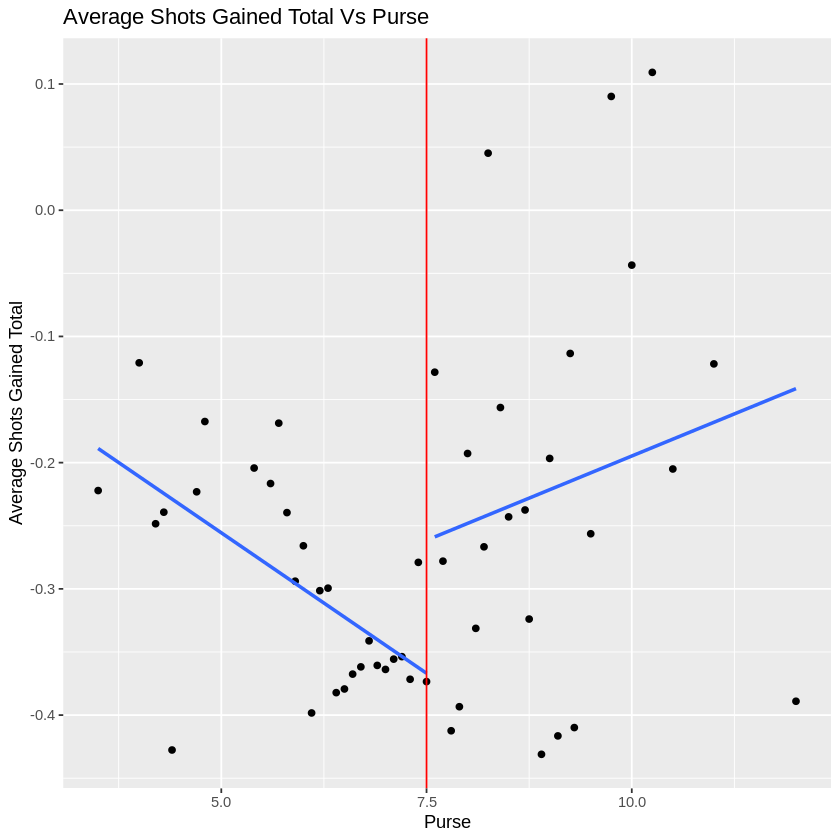

In [71]:
purse_sg <- ggplot(data=money_sg, aes(x=purse,y=avg_sg)) +
geom_point() +
geom_smooth(data=small_money, aes(x=purse, y=avg_sg), method = "lm", se = FALSE) +
geom_smooth(data=big_money, aes(x=purse, y=avg_sg), method = "lm", se = FALSE) +
geom_vline(xintercept=7.5, colour='red') +
labs(title='Average Shots Gained Total Vs Purse', x='Purse', 
     y='Average Shots Gained Total')
purse_sg 